In [1]:
from tensorflow.keras.datasets import cifar100
(xtrain, ytrain), (xtest, ytest) = cifar100.load_data()

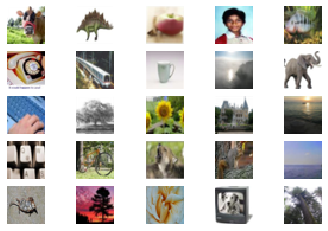

In [2]:
from matplotlib import pyplot as plt
import numpy as np

for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.imshow(xtrain[i], cmap=plt.cm.Greys)
    plt.axis('off')

In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras import backend as K

In [4]:
xtrain.shape

(50000, 32, 32, 3)

In [4]:
# normalizing
xtrain = xtrain / 255
xtest = xtest / 255

In [7]:
K.clear_session()

m = Sequential([
        Flatten(input_shape=(32, 32, 3)),
        Dense(512, activation='relu'),
        Dense(100, activation='softmax')
])

In [8]:
m.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 3072)              0         
_________________________________________________________________
dense (Dense)                (None, 512)               1573376   
_________________________________________________________________
dense_1 (Dense)              (None, 100)               51300     
Total params: 1,624,676
Trainable params: 1,624,676
Non-trainable params: 0
_________________________________________________________________


In [9]:
epochs=15
m.compile(optimizer='Adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
hist = m.fit(xtrain, ytrain, epochs=epochs, batch_size=128, validation_split=0.2)

Epoch 1/15
313/313 [==============================] - 6s 19ms/step - loss: 4.2307 - accuracy: 0.0680 - val_loss: 3.9553 - val_accuracy: 0.0992
Epoch 2/15
313/313 [==============================] - 6s 18ms/step - loss: 3.8163 - accuracy: 0.1210 - val_loss: 3.7812 - val_accuracy: 0.1341
Epoch 3/15
313/313 [==============================] - 6s 18ms/step - loss: 3.6731 - accuracy: 0.1461 - val_loss: 3.6532 - val_accuracy: 0.1561
Epoch 4/15
313/313 [==============================] - 6s 19ms/step - loss: 3.5667 - accuracy: 0.1670 - val_loss: 3.5951 - val_accuracy: 0.1625
Epoch 5/15
313/313 [==============================] - 6s 18ms/step - loss: 3.4930 - accuracy: 0.1809 - val_loss: 3.5507 - val_accuracy: 0.1685
Epoch 6/15
313/313 [==============================] - 6s 18ms/step - loss: 3.4278 - accuracy: 0.1926 - val_loss: 3.5169 - val_accuracy: 0.1719
Epoch 7/15
313/313 [==============================] - 6s 18ms/step - loss: 3.3770 - accuracy: 0.2018 - val_loss: 3.5098 - val_accuracy: 0.1831

In [10]:
m.evaluate(xtest, ytest, batch_size=128)

79/79 [==============================] - 0s 6ms/step - loss: 3.4096 - accuracy: 0.2076


[3.409573793411255, 0.20759999752044678]

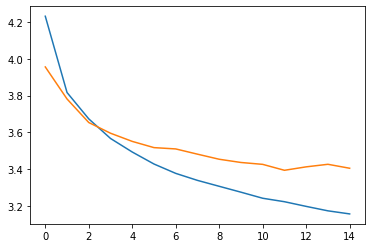

In [11]:
# inspect the history object
plt.plot(range(epochs), hist.history['loss'])
plt.plot(range(epochs), hist.history['val_loss'])

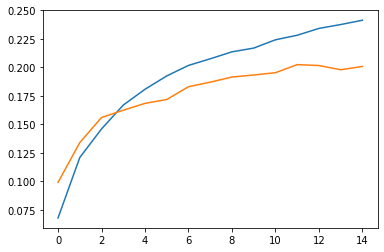

In [12]:
plt.plot(range(epochs), hist.history['accuracy'])
plt.plot(range(epochs), hist.history['val_accuracy'])

In [5]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D

In [6]:
cnn = Sequential([
    Conv2D(64, (3,3), activation='relu', input_shape=(32, 32, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3,3), activation='relu', input_shape=(32, 32, 3)),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(100, activation='softmax')
])

cnn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 64)        1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 2304)              0         
_________________________________________________________________
dense (Dense)                (None, 512)               1180160   
_________________________________________________________________
dense_1 (Dense)              (None, 100)               5

In [7]:
epochs=25
cnn.compile(optimizer='Adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
hist = cnn.fit(xtrain, ytrain, epochs=epochs, batch_size=128, validation_split=0.2)

Epoch 1/25
313/313 [==============================] - 41s 130ms/step - loss: 3.8050 - accuracy: 0.1285 - val_loss: 3.3414 - val_accuracy: 0.1968
Epoch 2/25
313/313 [==============================] - 40s 127ms/step - loss: 3.0497 - accuracy: 0.2571 - val_loss: 2.9279 - val_accuracy: 0.2883
Epoch 3/25
313/313 [==============================] - 40s 128ms/step - loss: 2.6922 - accuracy: 0.3284 - val_loss: 2.7805 - val_accuracy: 0.3156
Epoch 4/25
313/313 [==============================] - 40s 128ms/step - loss: 2.4036 - accuracy: 0.3876 - val_loss: 2.6698 - val_accuracy: 0.3363
Epoch 5/25
313/313 [==============================] - 41s 130ms/step - loss: 2.1615 - accuracy: 0.4401 - val_loss: 2.6228 - val_accuracy: 0.3532
Epoch 6/25
313/313 [==============================] - 41s 131ms/step - loss: 1.9265 - accuracy: 0.4916 - val_loss: 2.6338 - val_accuracy: 0.3567
Epoch 7/25
313/313 [==============================] - 41s 131ms/step - loss: 1.7090 - accuracy: 0.5441 - val_loss: 2.6516 - val_ac

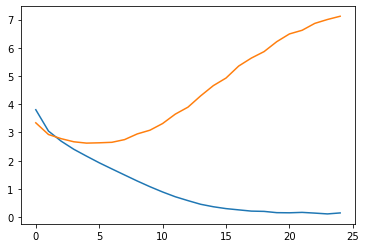

In [8]:
plt.plot(range(epochs), hist.history['loss'])
plt.plot(range(epochs), hist.history['val_loss'])

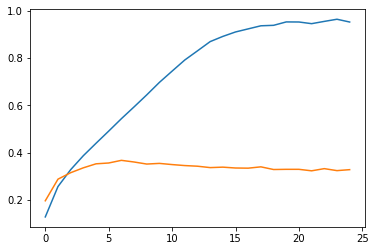

In [9]:
plt.plot(range(epochs), hist.history['accuracy'])
plt.plot(range(epochs), hist.history['val_accuracy'])